# Proyecto de minería de Datos:
# Speed dating





Nombre:
- Tomás Alvarado
- José Tomás Aguilera
- Sebastián Brzvic
- Lukas Vásquez
- Patricio Yañez

In [ ]:
#librerías necesarias para abordar el informe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

import matplotlib
matplotlib.style.use('ggplot')

In [ ]:

#importar el dataset previamente guardado en el enviroment
dataset_sample = pd.read_csv('/content/speeddating.csv')


## Explicación de la columnas


| Variable                      | Descripción                                                 |
|-------------------------------|------------------------------------------------------------|
| iid                        | identificador de la persona                                       |
| pid                        | identificador de la pareja                                       |
| gender                        | Género de la persona                                       |
| age                           | Edad de la persona                                         |
| age_o                         | Edad de la pareja                                          |
| d_age                         | Diferencia de edad                                         |
| d_age                         | Diferencia de edad                                         |
| race                          | Raza de la persona                                         |
| race_o                        | Raza de la pareja                                          |
| samerace                      | Si las dos personas tienen la misma raza o no               |
| importance_same_race          | ¿Qué tan importante es que la pareja sea de la misma raza?  |
| importance_same_religion      | ¿Qué tan importante es que la pareja tenga la misma religión? |
| field                         | Campo de estudio                                           |
| field_cd                         | Campo de estudio codificado (del 1 al 16) |pref_o_attractive             | ¿Qué tan importante considera la pareja la atracción?       |
| pref_o_sinsere                | ¿Qué tan importante considera la pareja la sinceridad?      |
| pref_o_intelligence           | ¿Qué tan importante considera la pareja la inteligencia?    |
| pref_o_funny                  | ¿Qué tan importante considera la pareja el sentido del humor? |
| pref_o_ambitious              | ¿Qué tan importante considera la pareja la ambición?        |
| pref_o_shared_interests       | ¿Qué tan importante considera la pareja los intereses compartidos? |
| attractive_o                  | Calificación de la pareja (sobre mí) sobre atractivo        |
| sincere_o                     | Calificación de la pareja (sobre mí) sobre sinceridad       |
| intelligence_o                | Calificación de la pareja (sobre mí) sobre inteligencia     |
| funny_o                       | Calificación de la pareja (sobre mí) sobre sentido del humor |
| ambitous_o                    | Calificación de la pareja (sobre mí) sobre ambición         |
| shared_interests_o            | Calificación de la pareja (sobre mí) sobre intereses compartidos |
| attractive_important          | ¿Qué buscas en una pareja? - Atractivo                      |
| sincere_important             | ¿Qué buscas en una pareja? - Sinceridad                     |
| intellicence_important        | ¿Qué buscas en una pareja? - Inteligencia                   |
| funny_important               | ¿Qué buscas en una pareja? - Sentido del humor              |
| ambtition_important           | ¿Qué buscas en una pareja? - Ambición                       |
| shared_interests_important    | ¿Qué buscas en una pareja? - Intereses compartidos          |
| attractive                    | Califica tu atractivo                                       |
| sincere                       | Califica tu sinceridad                                      |
| intelligence                  | Califica tu inteligencia                                    |
| funny                         | Califica tu sentido del humor                               |
| ambition                      | Califica tu ambición                                        |
| attractive_partner            | Califica a tu pareja - Atractivo                            |
| sincere_partner               | Califica a tu pareja - Sinceridad                           |
| intelligence_partner          | Califica a tu pareja - Inteligencia                         |
| funny_partner                 | Califica a tu pareja - Sentido del humor                    |
| ambition_partner              | Califica a tu pareja - Ambición                             |
| shared_interests_partner      | Califica a tu pareja - Intereses compartidos                |
| sports                        | Tus intereses personales [1-10]                             |
| interests_correlate           | Correlación entre los intereses de los participantes |
| expected_happy_with_sd_people | ¿Qué tan feliz esperas ser con las personas que conoces durante el evento de speed-dating? |
| expected_num_interested_in_me | De las 20 personas que conocerás, ¿cuántas crees que estarán interesadas en salir contigo? |
| expected_num_matches          | ¿Cuántos matches esperas obtener?                          |
| like                          | ¿Te gustó tu pareja?                                       |
| guess_prob_liked              | ¿Qué tan probable crees que es que tu pareja te guste a ti? |
| met                           | ¿Has conocido a tu pareja antes?                            |
| decision                      | Decisión en la noche del evento.                           |
| decision_o                    | Decisión de la pareja en la noche del evento.              |
| match                         | Match (sí/no)



# Exploración de datos

Número de filas y columnas:

In [ ]:
dataset_sample.shape

(8378, 123)

Estadísticas de los atributos numéricos:

In [ ]:
dataset_sample.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,...,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,...,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,...,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,...,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,...,8.000000,6.000000,4.000000,0.210000,6.000000,4.000000,3.000000,6.000000,5.000000,0.000000
75%,15.000000,28.000000,28.000000,5.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,...,9.000000,8.000000,7.000000,0.430000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000
max,21.000000,55.000000,55.000000,37.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,20.000000,18.000000,10.000000,10.000000,8.000000


Columnas del dataset:

In [ ]:
len(dataset_sample.columns)
dataset_sample.ambitous_o

0        8.0
1        7.0
2       10.0
3        9.0
4        9.0
        ... 
8373     6.0
8374     7.0
8375     2.0
8376     3.0
8377     7.0
Name: ambitous_o, Length: 8378, dtype: float64

In [ ]:
dataset_sample.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,...,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,...,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,...,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,...,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,...,8.000000,6.000000,4.000000,0.210000,6.000000,4.000000,3.000000,6.000000,5.000000,0.000000
75%,15.000000,28.000000,28.000000,5.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,...,9.000000,8.000000,7.000000,0.430000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000
max,21.000000,55.000000,55.000000,37.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,20.000000,18.000000,10.000000,10.000000,8.000000


## Limpieza de Datos


Antes de empezar con la exploración  vamos a  efectuar una limpieza  general de los datos de manera que sea  más cómodo trabajar  con estos. Para esto se harán  los siguientes cambios:

-Eliminamos  todas las columnas  que son del tipo "d_atributo" pues agrupan en intervalos otras variables del dataset y esta información se puede generar por cuenta propia, cuando sea necesario.

-Todos los  datos del tipo  “b0” (same race,decision ,decision_o  y match)  serán reemplazados por el  entero  correspondiente.

-Los atributos del  tipo  “b atributo ” son reemplazados  por “atributo”.

-Se le da un nombre más intuitivo a las etnias de los participantes.



In [ ]:
#Se botan los atributos que se pueden deducir de otros ya incorporados en la tabla

dataset_sample = dataset_sample.drop(['has_null', 'd_importance_same_race', 'd_importance_same_religion', 'd_d_age',
                               'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
                               'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests',
                               'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o',
                               'd_attractive_important', 'd_sincere_important', 'd_intellicence_important',
                               'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important', 'd_attractive', 'd_sincere',
                               'd_intelligence', 'd_funny', 'd_ambition', 'd_attractive_partner', 'd_sincere_partner',
                               'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner', 'd_sports',
                               'd_tvsports', 'd_exercise', 'd_dining', 'd_museums', 'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading',
                               'd_tv', 'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping', 'd_yoga', 'd_interests_correlate',
                               'd_expected_happy_with_sd_people',
                               'd_expected_num_interested_in_me', 'd_expected_num_matches', 'd_like', 'd_guess_prob_liked'] , axis=1)

#cambiar booleanos por numéricos
dataset_sample['samerace'] = dataset_sample['samerace'].replace({"b'0'": "0", "b'1'": "1"})
dataset_sample['decision'] = dataset_sample['decision'].replace({"b'0'": "0", "b'1'": "1"})
dataset_sample['decision_o'] = dataset_sample['decision_o'].replace({"b'0'": "0", "b'1'": "1"})
dataset_sample['match'] = dataset_sample['match'].replace({"b'0'": "0", "b'1'": "1"})

dataset_sample['decision_o'] = dataset_sample['decision_o'].astype(int)
dataset_sample['samerace'] = dataset_sample['samerace'].astype(int)
dataset_sample['decision'] = dataset_sample['decision'].astype(int)
dataset_sample['match'] = dataset_sample['match'].astype(int)

#booleanos por literales
dataset_sample['gender'] = dataset_sample['gender'].replace({"b'female'": 'female', "b'male'": 'male'})
dataset_sample=dataset_sample.rename(columns={'ambitous_o':'ambition_o','sinsere_o':'sincere_o'})

#cambiar los distintos tipos de raza por una representativa del grupo
race_names={
    "b'Asian/Pacific Islander/Asian-American'":"Asian",
    "b'European/Caucasian-American'":"European",
    "b'Latino/Hispanic American'":"Latino",
    "b'Black/African American'":"African",
     "b'Other'":"Other",
     "b'?'":'Not mencioned'
}


In [ ]:
#este código se corre solo una vez
#porque es para cambiar las razas en el data_sample
dataset_sample['race']=dataset_sample['race'].apply(lambda x: race_names[x])
dataset_sample['race_o']=dataset_sample['race_o'].apply(lambda x: race_names[x])


In [ ]:
new_data=pd.read_csv("newspeeddating.csv",encoding='latin-1')
dataset_sample=pd.concat([dataset_sample,new_data.loc[:,['iid','pid','field_cd']]],axis=1)
dataset_sample.shape

FileNotFoundError: ignored

## Variables a Explorar:
Ahora que ya estamos satisfechos con el dataset, procederemos a indagar sobre los comportamientos de los distintos atributos.Estos los agruparemos en:

- Edades
- Cualidades(Inteligencia,Atractivo,etc)
- Raza
- Relacion Puntuación Match


##Exploración Edades
 análisis  general  de las distribuciones  de las edades  de las  personas incluídas en este experimento




In [ ]:
figure,ax=plt.subplots()
figure.suptitle("Distribución edades")


pd.plotting.hist_series(dataset_sample['age'],bins=18,ax=ax)
ax.set_xlabel("Edad")
ax.set_ylabel("Densidad")
ax.set_xlim(left=15,right=40)

dataset_sample['age'].describe()

### Edades y género
 se agrupará el dataset  de acuerdo al sexo del participante y se generan los gráficos correspondientes  en cada grupo.



In [ ]:
#agrupacion por edades
gender_groups=dataset_sample.groupby('gender')# retorna name,group
#separacion por genero

#males
males_table=gender_groups.get_group('male')
for col in males_table.columns:
  males_table=males_table.rename(columns={col:'males_'+col})
#females
females_table=gender_groups.get_group('female')
for col in females_table.columns:
  females_table=females_table.rename(columns={col:'females_'+col})
#df edades
ages=pd.concat([females_table['females_age'],males_table['males_age']],axis=1)

In [ ]:
#  histograma edades
figure,ax=plt.subplots(3,1,figsize=(7,11))
figure.suptitle("Edades según sexo")


pd.plotting.hist_series(males_table['males_age'],color='blue',label='hombres',bins=18,ax=ax[0])
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Densidad")
ax[0].legend()
ax[0].set_xlim(left=15,right=40)

pd.plotting.hist_series(females_table['females_age'],color='orange',label='mujeres',bins=18,ax=ax[1])
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Densidad")
ax[1].legend()
ax[1].set_xlim(left=15,right=40)

#  boxplot edades
pd.plotting.boxplot(ages,ax=ax[2],showmeans=True,boxprops={'color':'blue'},medianprops={'color':'orange'},ylabel='Age')




### Edades y número de matches


Se ilustra en el gráfico la distribución en la cantidad del matches que recibe la persona dada su edad

In [ ]:
#agrupar por edades
#dataset_sample['match'] = dataset_sample['match'].astype(int)
age_groups=dataset_sample.groupby('age')
age_matches = dataset_sample.groupby('age')['match'].sum()

plt.bar(age_matches.index, age_matches.values, color='orange')
plt.xlim(17, 45)
plt.xlabel('Edad')
plt.ylabel('Número de matches')
plt.title('Número de matches por edad')
plt.show()

##Exploracion cualidades





### Percepción propia vs percepción de las parejas

 agrupado los datos de acuerdo a la evaluación propia del individuo y la de la pareja.





In [ ]:
#percepcion propia vs ajena de atributos
#tables
dataset_sample.columns
atributes_table=dataset_sample.loc[:,['gender','age','age_o', 'attractive', 'sincere', 'intelligence','funny', 'ambition','attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambition_o']]
#atributes self-perception
self_perception_table=atributes_table.loc[:,['attractive', 'sincere', 'intelligence','funny', 'ambition']]
#atributes partner-perception
partner_perception_table=atributes_table.loc[:,['attractive_o', 'sincere_o', 'intelligence_o','funny_o', 'ambition_o']]

In [ ]:
#distribucion percepción propia vs pareja
fig,ax=plt.subplots(2,figsize=(6,11))

pd.plotting.boxplot(self_perception_table,vert=False,ax=ax[0],showfliers=False,showmeans=True)
ax[0].set_title("Distribución percepción propia")
pd.plotting.boxplot(partner_perception_table,vert=False,ax=ax[1],showfliers=False,showmeans=True)
ax[1].set_title("Distribución percepción de la pareja")
ax[1].set_xlabel("Puntuación (1 a 10)")


Luego se calculan los promedios de estos para cada atributo.Los resultados son los siguientes.


In [ ]:
for col in partner_perception_table.columns:
  partner_perception_table=partner_perception_table.rename(columns={col:col.rstrip('_o')})

merge_table=pd.concat([self_perception_table.mean(),partner_perception_table.mean()],axis=1)
merge_table=merge_table.rename(columns={0:'percepción propia',1:'percepción pareja'})

fig,ax=plt.subplots(1)
fig.suptitle("Percepcion propia y de la pareja respecto a atributos")
merge_table.plot.area(stacked=False,ax=ax)
ax.set_ylabel("Promedio (1 a 10)")
merge_table

Es  posible deducir  que en promedio  el sujeto tiende  a sobrestimar sus atributos  con respecto a la opinión  de la pareja. Es interesante mencionar que la mayor discrepancia de estimación se produce en el atributo “gracioso/a”.



###Exploracion preferencias por sexo


se obtienen las principales estadísticas  de las preferencias  (a nivel global)  y se visualizan  en  gráficos de caja para cada atributo.




In [ ]:
#preferences
dataset_sample.head()
preferences_table=dataset_sample.loc[:,['race','age','gender','attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important']]

#preferences distribution
fig,ax=plt.subplots()
pd.plotting.boxplot(preferences_table.loc[:,['attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important']],vert=False,showfliers=False,ax=ax,showmeans=True)
ax.set_title('Distribución de preferencias')
ax.set_xlabel('Puntuación(1 a 100)')
preferences_table.describe()


In [ ]:
#preferences  by gender
gender_prefences_groups=preferences_table.loc[:,['gender','attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important']].groupby('gender')

males_preferences=gender_prefences_groups.get_group('male')
females_preferences=gender_prefences_groups.get_group('female')

females_preferences.describe()

In [ ]:
males_preferences.describe()

In [ ]:

pref_by_gender=pd.concat([males_preferences.mean(),females_preferences.mean()],axis=1)
pref_by_gender=pref_by_gender.rename(columns={0:'preferencias masculinas',1:'preferencias femeninas'})
#ploting gender preferences
fig ,ax=plt.subplots()
fig.suptitle("Preferencias por sexo")
pref_by_gender.plot.barh(ax=ax)
ax.set_xlabel("Promedio")




Se observa una clara diferencia  entre las preferencias de los hombres  y mujeres.Es posible notar que en promedio  los hombres de este experimento tenían una mayor preferencia  al atributo “belleza”. Mientras que las mujeres de este estudio  puntuaron mejor el atributo “inteligencia”. Notar que para ambos grupos  la “ambición” fue lo menos relevante.


###Análisis diferencias de atributos en match  y no match

se observó la diferencia en las calificaciones que recibían los usuarios que hacían match y los que no en cada atributo, incluyendo la edad. Se buscó determinar si existía algún atributo que, al ser muy diferente, implicaba de manera certera un rechazo. En el caso de la edad, se consideró si una gran diferencia de edad podría implicar un rechazo.





In [ ]:
import matplotlib.pyplot as plt

###Intento de grafico las diferencias de atributos en los match y no match

sub_data = dataset_sample.loc[:, ["d_age", "attractive_o", "sincere_o", "intelligence_o", "funny_o",  "ambition_o", "shared_interests_o", "attractive_partner", "sincere_partner", "intelligence_partner", "funny_partner", "ambition_partner", "shared_interests_partner", "match"]]
sub_data["attractive_diff"] = sub_data["attractive_partner"].sub(sub_data["attractive_o"]).abs()
sub_data["sincere_diff"] = sub_data["sincere_partner"].sub(sub_data["sincere_o"]).abs()
sub_data["intelligence_diff"] = sub_data["intelligence_partner"].sub(sub_data["intelligence_o"]).abs()
sub_data["funny_diff"] = sub_data["funny_partner"].sub(sub_data["funny_o"]).abs()
sub_data["ambitous_diff"] = sub_data["ambition_partner"].sub(sub_data["ambition_o"]).abs()
sub_data["shared_interests_diff"] = sub_data["shared_interests_partner"].sub(sub_data["shared_interests_o"]).abs()

sub_data.drop([ "attractive_o", "sincere_o", "intelligence_o", "funny_o",  "ambition_o", "shared_interests_o", "attractive_partner", "sincere_partner", "intelligence_partner", "funny_partner", "ambition_partner", "shared_interests_partner"], axis=1, inplace=True)

matches = sub_data[sub_data["match"] == 1]
non_matches = sub_data[sub_data["match"] == 0]

# create a list of the columns to create box plots for
columns = ["d_age", "attractive_diff", "sincere_diff", "intelligence_diff", "funny_diff", "ambitous_diff", "shared_interests_diff"]


fig,ax=plt.subplots()
pd.plotting.boxplot(matches.loc[:,columns],vert=False,showfliers=False,ax=ax,showmeans=True)
ax.set_title('Match')
ax.set_xlabel('Difference in rating')

fig,ax=plt.subplots()
pd.plotting.boxplot(non_matches.loc[:,columns],vert=False,showfliers=False,ax=ax,showmeans=True)
ax.set_title('No Match')
ax.set_xlabel('Difference in rating')



### Analisis de match en personas de atributos similares
Otra duda interesante  que se explora es la de si las personas que poseen atributos similares tienden a gustarse. Se abordará esta interrogante para el atributo  “inteligencia”.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrar las filas que no tienen valores NaN o None en la columna "match"
i_dataset_sample = dataset_sample[dataset_sample['match'].notna()]

# Convertir la columna "match" a tipo entero si es de tipo objeto
#if i_dataset_sample['match'].dtype == np.object:
#   i_dataset_sample['match'] = i_dataset_sample['match'].astype(int)

# Calcular la diferencia entre "intelligence_o" e "intelligence"
i_dataset_sample['intelligence_diff'] = abs(i_dataset_sample['intelligence_o'] - i_dataset_sample['intelligence'])

# Contar la cantidad de filas que hacen match con cada valor en "intelligence_diff"
match_counts = i_dataset_sample[i_dataset_sample['match'] == 1]['intelligence_diff'].value_counts().sort_index()

# Verificar que al menos una fila tiene "1" como valor en "match"
assert (i_dataset_sample['match'] == 1).any(), "No hay filas con valor de match igual a 1"

# Verificar que hay valores únicos en la columna "intelligence_diff"
assert i_dataset_sample['intelligence_diff'].nunique() > 0, "No hay valores únicos en la diferencia de inteligencias"

# Graficar los resultados
fig, ax = plt.subplots()
ax.bar(match_counts.index, match_counts.values,color='pink')
ax.set_xlabel('Absoluto de la diferencia de inteligencias')
ax.set_ylabel('Cantidad de matches')
plt.show()

# Verificar que la figura esté mostrando algo
#assert fig.canvas.renderer.buffer_rgba().sum() > 0, "La figura está vacía"


Podemos  deducir que existe una correlación inversa  entre  la diferencia  de edades  y  los matches  entre participantes, notar  que  se presenta una mayor cantidad de matches  mientras  su inteligencia (auto percibida) sea parecida.


## Exploración Razas




Para abordar esto se agrupan a los participantes por raza  y se cuentan la cantidad de likes (decisiones positivas) y matches que  estos obtienen (Gráfico 1), en este caso  estamos contando cantidades totales.En segunda instancia se calcularán estos mismos atributos (matches y likes) pero calculando su promedio.

In [ ]:

likes = dataset_sample.groupby("race")["decision_o"].sum()
matches = dataset_sample.groupby("race")["match"].sum()

# Generar el gráfico de barras
likes.plot(kind='bar', color='blue')

matches.plot(kind='bar', color='orange')

plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.title('Cantidad de likes/matches por raza')
plt.legend(labels=['Like', 'Match'])





plt.show()


cantidad_personas_por_raza = dataset_sample['race'].value_counts()

prop_sies_por_raza = dataset_sample.groupby('race')['decision_o'].mean()
prop_match_por_raza = dataset_sample.groupby('race')['match'].mean()

colores = ['r', 'g', 'b']

#diferencia de porcentajes
dif = pd.merge(prop_sies_por_raza, prop_match_por_raza, on='race', how='left')



# Generar el gráfico de barras
dif.plot(kind='bar', color=colores)
plt.xlabel('Raza')
plt.ylabel('Porcentaje')
plt.title('Porcentajes')
plt.legend(labels=['Like', 'Match'])

plt.show()

## Análisis de puntuación y decisiones positivas

Una vez es terminado el experimento  de cita para cada pareja, se pide a cada uno de los integrantes  que evalúen en general a su pareja  en la escala del 1 al 10 (like) y que entreguen una decisión (si ambos  deciden positivamente  hay un match).A continuación  indagaremos cuantas decisiones positivas son otorgadas  a los individuos  en relación a su like.


In [ ]:
## decision sobre una persona  basado en su puntuación (l)

##  like vs  decision
like_table=dataset_sample.loc[:,['like','decision']]
like_table['like']=round(like_table['like'])


total_likes=like_table.groupby('like').sum().rename(columns={'decision':'sum'})
count_likes=like_table.groupby('like').count().rename(columns={'decision':'count'})
merged_like_table=pd.concat([total_likes,count_likes],axis=1)
merged_like_table['avg']=merged_like_table['sum']/merged_like_table['count']
merged_like_table

fig,ax=plt.subplots(2)
merged_like_table['avg'].plot(ax=ax[1])

like_table['like'].hist(ax=ax[0],bins=11,figsize=(7,12))
ax[0].set_title('Distribucion like')
ax[0].set_ylabel('Densidad')
ax[0].set_xlabel('Puntuación (like de 1 a 10)')


merged_like_table['avg'].plot(ax=ax[1])
ax[1].set_title('Decisiones sobre sujeto de acuerdo al like')
ax[1].set_ylabel('Probabilidad de decision positiva')
ax[1].set_xlabel('Puntuación (like de 1 a 10)')

# Experimento 1 (Impotancia Atributos)


## preprocesing


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

#eliminamos  columna de ocupaciones pues son demasiadas diferentes que no aportan al modelo
#eliminamos  columna wave que no tienen sentido en el modelo (labels  o informacion innecesaria)
processed_data=dataset_sample.drop(['field','wave','decision','decision_o'],axis=1)

#transformamos columnas categóricas (son todas nominales)  en numéricas aprevechamos race, race_o y genero
nominal_categories = processed_data[['gender', 'race', 'race_o']]
encoder = OneHotEncoder(sparse_output=False)
nominal_encoded=encoder.fit_transform(nominal_categories)
columns_encoded = encoder.get_feature_names_out(nominal_categories.columns)
nominal_categories = pd.DataFrame(nominal_encoded, columns=columns_encoded)

processed_data=processed_data.drop(['gender', 'race', 'race_o'],axis=1)
processed_data=pd.concat([processed_data, nominal_categories], axis=1)
#inputamos naN  para no perder datos ,si eliminamos filas con nulos nos qiedamos con solo 1000 filas
# len(processed_data.dropna())
imputer = KNNImputer(n_neighbors=5)
processed_data=imputer.fit_transform(processed_data)
processed_data=pd.DataFrame(processed_data,columns=imputer.feature_names_in_)
processed_data.isna().sum()


age                     0
age_o                   0
d_age                   0
samerace                0
importance_same_race    0
                       ..
race_o_Asian            0
race_o_European         0
race_o_Latino           0
race_o_Not mencioned    0
race_o_Other            0
Length: 74, dtype: int64

## Arbol decision (todas las columnas no label)

In [ ]:
#Arbol de desición
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#separamos labels
decisionT_X = processed_data.drop(['match'], axis=1)
decisionT_y = processed_data['match']

#se divide el conjunto en 70-30 entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(decisionT_X, decisionT_y, test_size=.33,random_state=37,stratify=decisionT_y)
#entrenamos el modelo
tree_clasiffier=DecisionTreeClassifier()
tree_clasiffier.fit(X_train,y_train)

#aunque no es el objetivo del  experimento, obtenemos métricas (2 objetivos tener un piso para los exp de clasificación , tener alguna certeza de la representabilidad del árbol)
y_pred = tree_clasiffier.predict(X_test)
pd.Series(y_pred).value_counts()
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      2310
         1.0       0.33      0.32      0.33       455

    accuracy                           0.78      2765
   macro avg       0.60      0.60      0.60      2765
weighted avg       0.78      0.78      0.78      2765



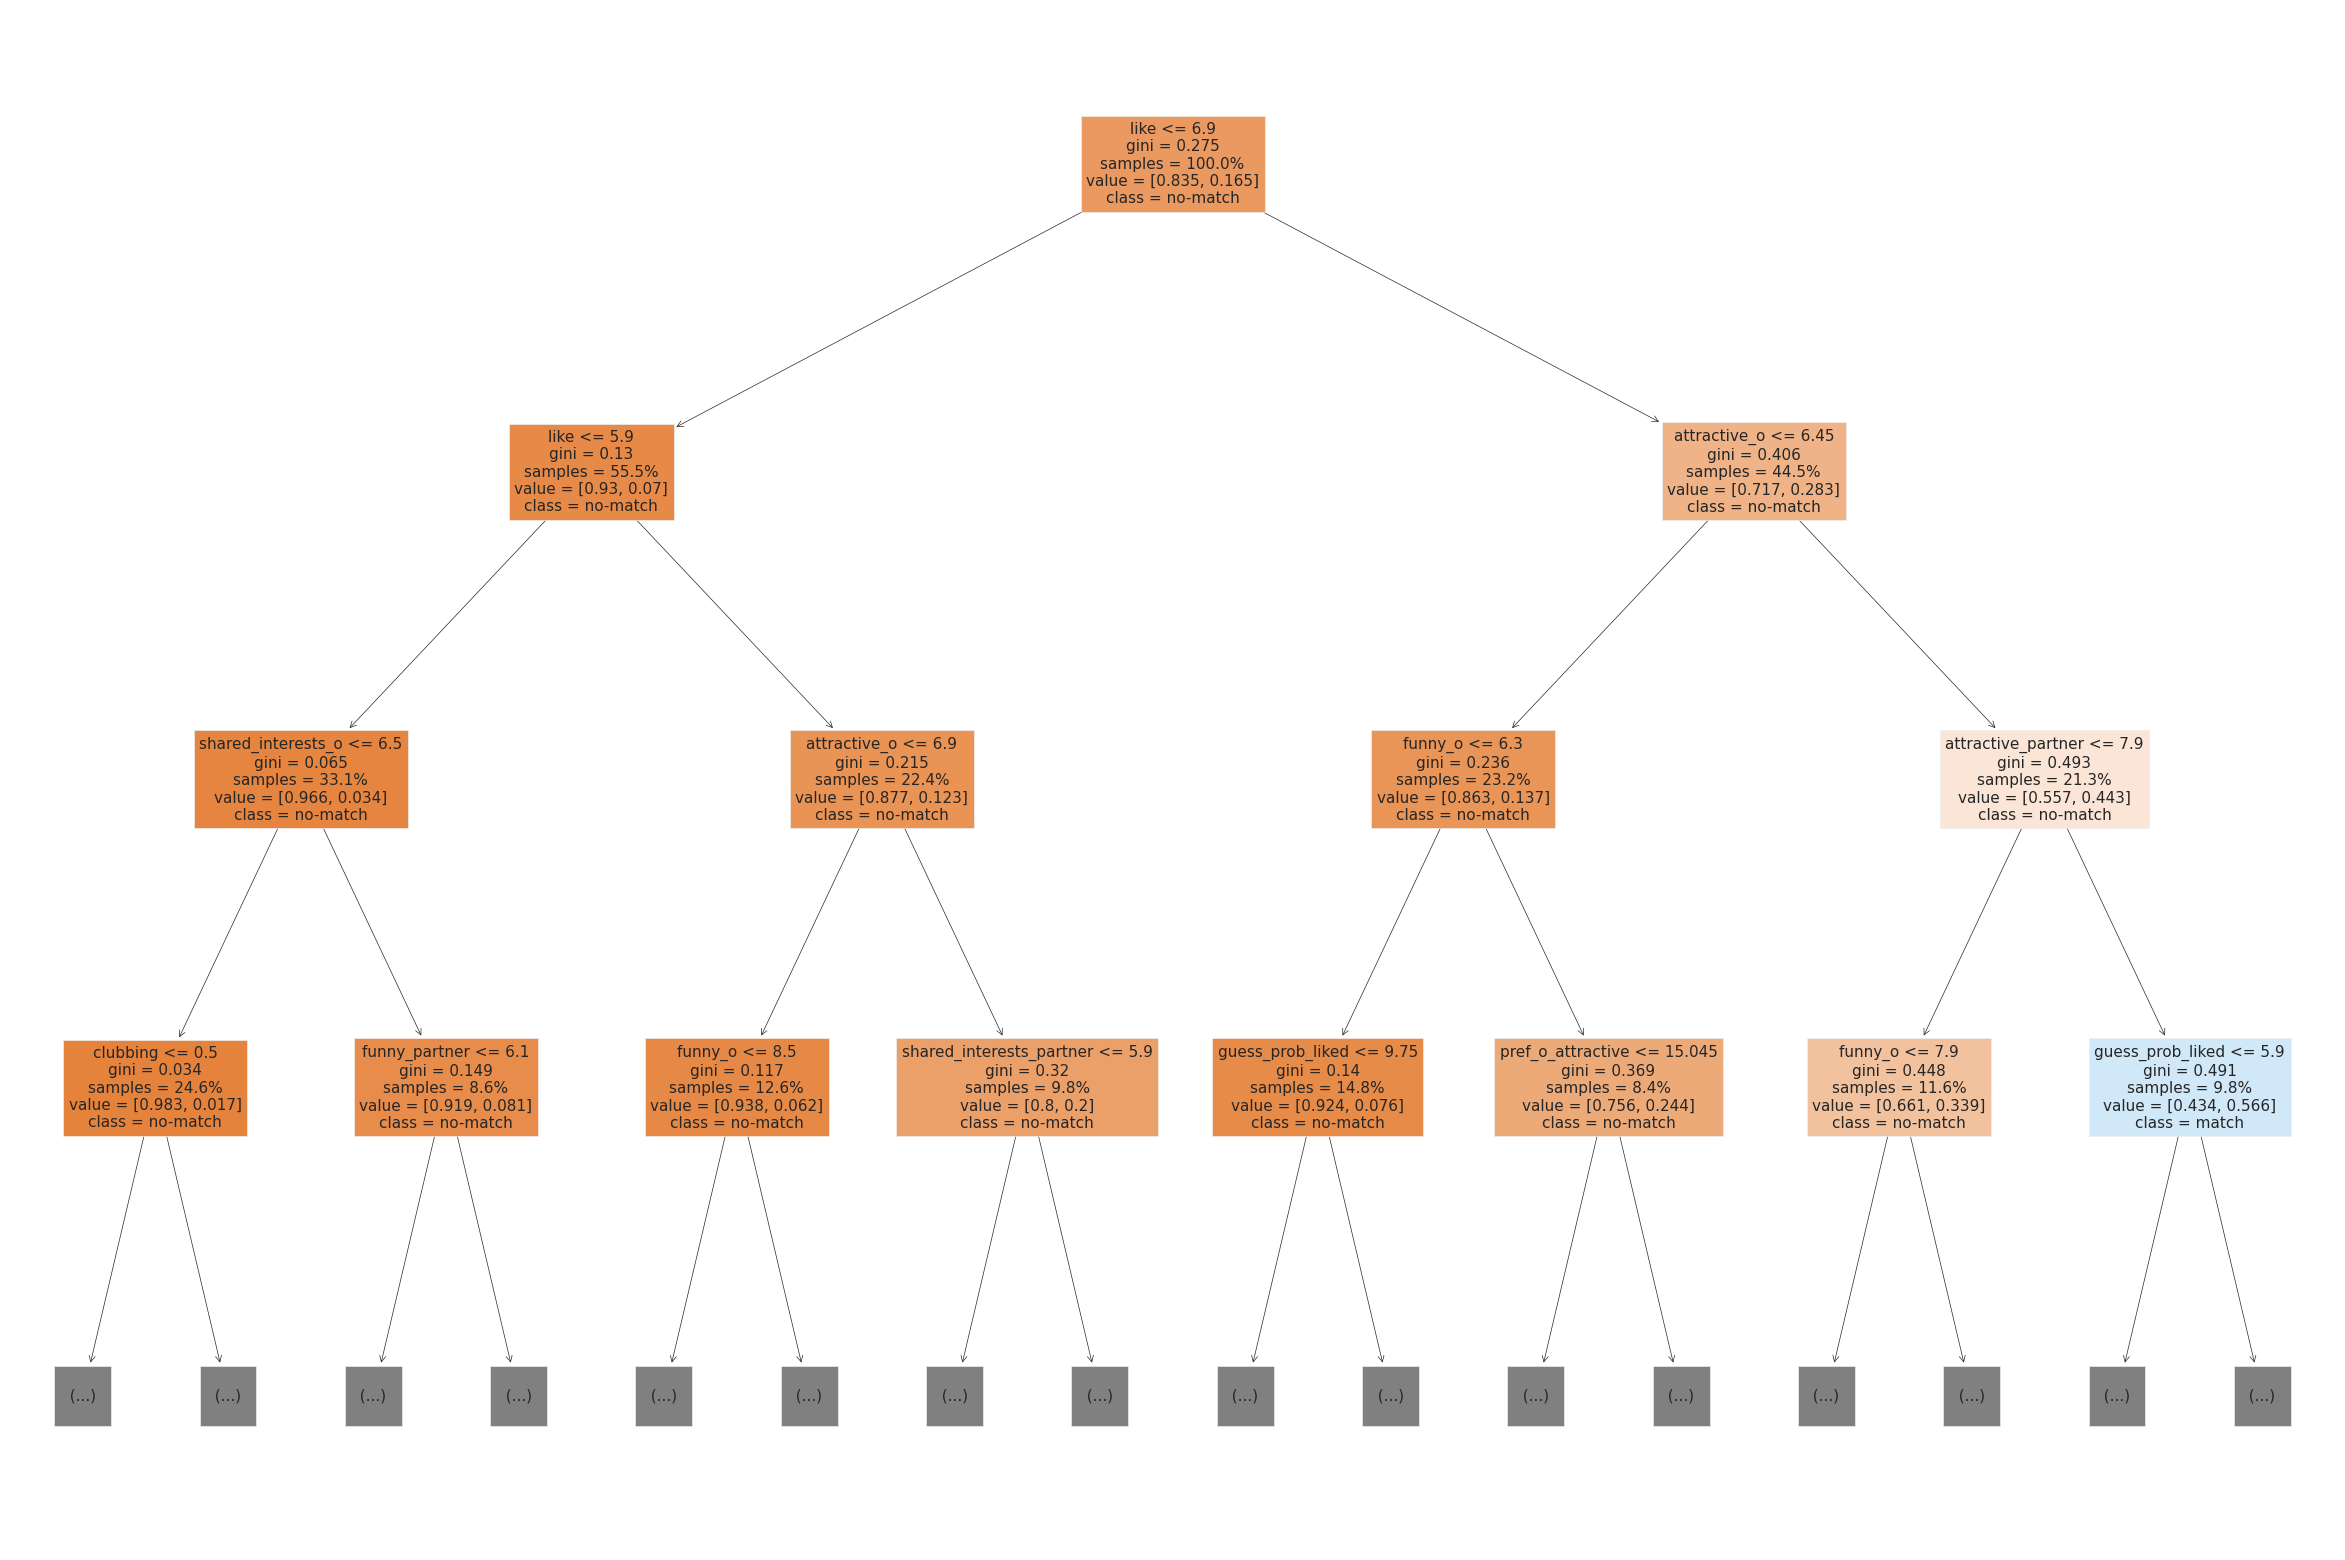

In [ ]:
#visualizacion de arbol
plt.figure(figsize = (30,20))
plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    tree_clasiffier, # Objeto de nuestro árbol de decisión entrenado.
    feature_names = processed_data.columns, # Nombres de las variables utilizadas para entrenar.
    class_names = ["no-match","match"], # Nombre de las clases que estamos prediciendo.
    max_depth=3,#altura del arbol
    proportion = True, # Visualizamos las proporciones de datos en cada nodo de decisión,
    filled=True, # Coloreamos los nodos
    fontsize=11, # Establecemos el tamaño de la letra del texto dentro de cada nodo.
)
plt.show()

## Random Forest (Todas las columnas no label)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Elimina las filas que contienen valores nulos o faltantes
processed_data = processed_data.dropna()

# eliminamos características directamente relacionadas al match
X = processed_data.drop(['match'], axis=1)

# Divide el conjunto de datos en características y objetivos
y = processed_data['match']


# Crea el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importance = model.feature_importances_

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})

feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

print(feature_importance)



                 feature  importance
0                   like    0.051592
1           attractive_o    0.051516
2     shared_interests_o    0.039199
3                funny_o    0.039134
4     attractive_partner    0.033535
..                   ...         ...
68        race_o_African    0.001978
69            race_Other    0.001625
70          race_African    0.001589
71  race_o_Not mencioned    0.000422
72    race_Not mencioned    0.000265

[73 rows x 2 columns]


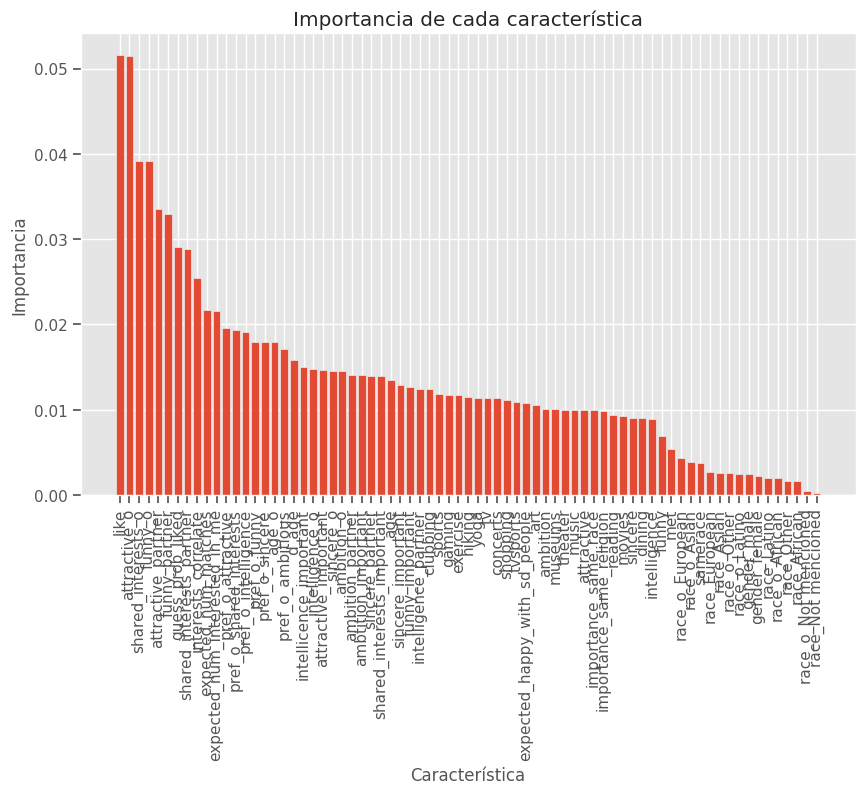

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.xlabel('Característica')
plt.title('Importancia de cada característica')
plt.show()

## Decision Tree (sólo atributos fisicos/personalidad de los participantes)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

#eliminamos  columna de ocupaciones pues son demasiadas diferentes que no aportan al modelo
#eliminamos  columna wave que no tiene sentido en el modelo
#eliminamos  columnsque no tienen que ver  con la personalidad ni con el fisico
processed_data=dataset_sample.drop(['field','wave','decision','decision_o','like',],axis=1)

#transformamos columnas categóricas (son todas nominales)  en numéricas aprevechamos race, race_o y genero
nominal_categories = processed_data[['gender', 'race', 'race_o']]
encoder = OneHotEncoder(sparse_output=False)
nominal_encoded=encoder.fit_transform(nominal_categories)
columns_encoded = encoder.get_feature_names_out(nominal_categories.columns)
nominal_categories = pd.DataFrame(nominal_encoded, columns=columns_encoded)

processed_data=processed_data.drop(['gender', 'race', 'race_o'],axis=1)
processed_data=pd.concat([processed_data, nominal_categories], axis=1)
#inputamos naN  para no perder datos ,si eliminamos filas con nulos nos qiedamos con solo 1000 filas
# len(processed_data.dropna())
imputer = KNNImputer(n_neighbors=5)
processed_data=imputer.fit_transform(processed_data)
processed_data=pd.DataFrame(processed_data,columns=imputer.feature_names_in_)
processed_data.isna().sum()

processed_data.columns


Index(['age', 'age_o', 'd_age', 'samerace', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'pref_o_shared_interests', 'attractive_o', 'sincere_o',
       'intelligence_o', 'funny_o', 'ambition_o', 'shared_interests_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important',
       'attractive', 'sincere', 'intelligence', 'funny', 'ambition',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
       'music', 'shopping', 'yoga', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me

In [ ]:
y

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
8373    0.0
8374    0.0
8375    0.0
8376    0.0
8377    0.0
Name: match, Length: 8378, dtype: float64

# Experimento 2(Calsificacion):

In [ ]:
data.shape

NameError: ignored

In [ ]:

#row['ambition_o'] == compare_row['ambition_partner'] and
#row['ambition_partner'] == compare_row['ambition_o'] and
#row['shared_interests_o'] == compare_row['shared_interests_partner'] and
#row['shared_interests_partner'] == compare_row['shared_interests_o']

In [ ]:
df_match = data.copy()
df_match_0 = df_match[df_match["match"] == 0]

# Seleccionar 80 datos al azar
datos_al_azar = df_match_0.sample(n=180)


In [ ]:
datos_al_azar.shape

In [ ]:
df_match = data.copy()
df_match_1 = df_match[df_match["match"] == 1]
df_match_1.shape

In [ ]:
nuevos_datos = datos_al_azar.append(df_match_1, ignore_index=False)
nuevos_datos.shape

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC  # support vector machine
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np

def run_classifier(clf, X, y, num_tests=100):
    metrics = {'precision': [], 'recall': [], 'f1-score': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
        ### INICIO COMPLETAR ACÁ
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        #### TIP: en base a los set de entrenamiento, genere la variable 'predictions'
        #### que contiene las predicciones del modelo


        pd.Series(predictions).value_counts()

        ### FIN COMPLETAR ACÁ
        # 0=Malignant, 1=Benign. In sklearn metrics, positive label is by default=1
        #metrics['y_pred'] = predictions
        #metrics['precision'].append(precision_score(y_test, predictions, pos_label=0))
        #metrics['recall'].append(recall_score(y_test, predictions, pos_label=0))
        #metrics['f1-score'].append(f1_score(y_test, predictions, pos_label=0))
    return classification_report(y_test, predictions)


# Elimina las filas que contienen valores nulos o faltantes
processed_data = data.copy().dropna() #nuevos_datos.copy().dropna()#processed_data.dropna()
X = processed_data.drop(['match'], axis=1)

# Divide el conjunto de datos en características y objetivos
y = processed_data['match']

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
c4 = ("Support Vector Machines", SVC())

classifiers = [c0, c1, c2, c3, c4]

In [ ]:
results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)   # hay que implementarla en el bloque anterior.
    #results[name] = metrics
    print("----------------")
    print(metrics)
#    print("Resultados para clasificador: ", name)
#    print("Precision promedio:", np.array(metrics['precision']).mean())
#    print("Recall promedio:", np.array(metrics['recall']).mean())
#    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.utils import class_weight
import pandas as pd
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

datos_completos = data.copy()

def run_classifier(clf, X, y, num_tests=100):
    metrics = {'precision': [], 'recall': [], 'f1-score': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

        # Aplica oversampling con SMOTE
        smote = SMOTE(random_state=42)
        X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

        # Entrena el clasificador con los datos oversampleados
        clf.fit(X_train_oversampled, y_train_oversampled)

        # Realiza predicciones
        predictions = clf.predict(X_test)

        # Calcula las métricas de clasificación
        report = classification_report(y_test, predictions, output_dict=True)

        # Almacena las métricas de esta iteración
        metrics['precision'].append(report['weighted avg']['precision'])
        metrics['recall'].append(report['weighted avg']['recall'])
        metrics['f1-score'].append(report['weighted avg']['f1-score'])

    # Calcula el promedio de las métricas a través de las iteraciones
    #avg_metrics = {metric: sum(values) / len(values) for metric, values in metrics.items()}

    return classification_report(y_test, predictions)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['match'], axis=1), data["match"], test_size=.30)
#print(y_train)
# Aplica oversampling con SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
#conteo_match_x = X_train_oversampled["match"].value_counts()
conteo_match_y = y_train_oversampled.value_counts()

print(conteo_match_y)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


#Configure tuned_parameters
tuned_parameters = {'n_neighbors': [20, 25, 30, 35, 40, 45, 50],
                    'weights': ['uniform','distance']}

#set scoring metric
score = 'precision'

#Construir el clf con GridSearch
clf = GridSearchCV(KNeighborsClassifier(),
                   param_grid=tuned_parameters,
                   cv=10,
                   scoring=score)

#Entrenar clf
clf.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
#Configure tuned_parameters
tuned_parameters = {'n_neighbors': [20, 25, 30, 35, 40, 45, 50],
                    'weights': ['uniform','distance']}
tuned_parameters = {'max_depth': [2, 4, 6, 8, 10],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 3, 4]}

clasificador = DecisionTreeClassifier()
grid_search = GridSearchCV(clasificador, tuned_parameters)

grid_search.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

print(grid_search.best_score_)

In [ ]:
# Elimina las filas que contienen valores nulos o faltantes
#processed_data = processed_data.dropna()
# eliminamos características directamente relacionadas al match
#datos_completos.drop(['interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'wave_o', 'wave', 'field'], axis=1, inplace=True)

#
X = nuevos_datos.drop(['match'], axis=1) #datos_completos.drop(['match'], axis=1)

# Divide el conjunto de datos en características y objetivos
y = nuevos_datos['match'] #datos_completos['match']


c0 = ("DummyClassifier(strategy='stratified')", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=2, min_samples_leaf= 1, min_samples_split= 2))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=40, weights='distance'))
c4 = ("Support Vector Machines", SVC())

classifiers = [c0, c1, c2, c3, c4]


results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)  # llama a la función run_classifier
    print("----------------")
    print(metrics)
    print("----------------\n\n")
# Imprime los resultados

In [ ]:
## run_classifier recibe un clasificador y un dataset (X, y)
## y opcionalmente la cantidad de resultados que se quiere obtener del clasificador

from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np

def run_classifier(clf, X, y, num_tests=100):
    metrics = {'precision': [], 'recall': [], 'f1-score': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
        ### INICIO COMPLETAR ACÁ
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        #### TIP: en base a los set de entrenamiento, genere la variable 'predictions'
        #### que contiene las predicciones del modelo



        ### FIN COMPLETAR ACÁ
        # 0=Malignant, 1=Benign. In sklearn metrics, positive label is by default=1
        metrics['y_pred'] = predictions
        metrics['precision'].append(precision_score(y_test, predictions, pos_label=0))
        metrics['recall'].append(recall_score(y_test, predictions, pos_label=0))
        metrics['f1-score'].append(f1_score(y_test, predictions, pos_label=0))
    return metrics

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC  # support vector machine

#bc = load_breast_cancer()    # dataset cancer de mamas
X_bc = processed_data
y_bc = y

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
c4 = ("Support Vector Machines", SVC())

classifiers = [c0, c1, c2, c3, c4]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X_bc, y_bc)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name)
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset_sample.shape

In [ ]:
modified_data = dataset_sample.copy()

#muestreo de 100 filas
#modified_data = modified_data.sample(n=1000)
modified_data = modified_data.sort_values(by="wave")
modified_data.reset_index(drop=True, inplace=True)
modified_data.to_csv("test.csv", index=False)

In [ ]:
#una sola vez
test = modified_data.copy()

In [ ]:
#cada vez que se recarga
modified_data = test.copy()

In [ ]:
modified_data.shape

In [ ]:
#data_results = modified_data.columns.tolist()

data_results = modified_data.copy()

# Eliminar todas las filas del DataFrame copia
data_results = data_results.drop(data_results.index)
# Mostrar los encabezados
print(data_results)

In [ ]:
cols = modified_data.shape[1]
for col in modified_data.columns:
  cantidad_nan = modified_data[col].isna().sum()
  print(f"La columna '{col}' tiene \n{cantidad_nan} valores NaN.")


In [ ]:
modified_data.drop(['ambition_o', 'ambition_partner', 'shared_interests_partner', 'shared_interests_o'], axis=1, inplace=True)

In [ ]:
l = modified_data.shape[0]

# Iterar sobre cada fila del dataset_sampleFrame
for i in range(l):
    match_found = False
    row = modified_data.iloc[i]
    #print(i, row["wave"])
    # if(i == l-1):
    #   break

    # Comparar con cada fila restante en el dataset_sampleFrame
    for j in range(i + 1, l):
        compare_row = modified_data.iloc[j]
        if (row['wave'] != compare_row['wave']):
          break

        # Comprobar las condiciones de match
        if (
            row['age'] == compare_row['age_o'] and
            row['age_o'] == compare_row['age'] and
            row['d_age'] == compare_row['d_age'] and
            row['race_o'] == compare_row['race'] and
            row['race'] == compare_row['race_o'] and
            row['decision_o'] == compare_row['decision'] and
            row['decision'] == compare_row['decision_o'] and
            row['match'] == compare_row['match'] and
            #ahora comparar al reves es decir compare row attractive important con  row pref_o_attractive y con cada uno
            row['attractive_important'] == compare_row['pref_o_attractive'] and
            row['pref_o_attractive'] == compare_row['attractive_important'] and
            row['sincere_important'] == compare_row['pref_o_sincere'] and
            row['pref_o_sincere'] == compare_row['sincere_important'] and
            row['pref_o_intelligence'] == compare_row['pref_o_intelligence'] and
            row['pref_o_intelligence'] == compare_row['pref_o_intelligence'] and
            row['funny_important'] == compare_row['pref_o_funny'] and
            row['pref_o_funny'] == compare_row['funny_important'] and
            row['ambtition_important'] == compare_row['pref_o_ambitious'] and
            row['pref_o_ambitious'] == compare_row['ambtition_important'] and
            row['shared_interests_important'] == compare_row['pref_o_shared_interests'] and
            row['pref_o_shared_interests'] == compare_row['shared_interests_important'] and

            #attractive_o	sinsere_o	intelligence_o	funny_o	ambitous_o	shared_interests_o
            #attractive_partner	sincere_partner	intelligence_partner	funny_partner	ambition_partner	shared_interests_partner
            #ahora comparar row attractive_o con compare_row attractive_partner y al reves con cada uno
            row['attractive_o'] == compare_row['attractive_partner'] and
            row['attractive_partner'] == compare_row['attractive_o'] and
            row['sincere_o'] == compare_row['sincere_partner'] and
            row['sincere_partner'] == compare_row['sincere_o'] and
            row['intelligence_o'] == compare_row['intelligence_partner'] and
            row['intelligence_partner'] == compare_row['intelligence_o'] and
            row['funny_o'] == compare_row['funny_partner'] and
            row['funny_partner'] == compare_row['funny_o'] #and
            #row['ambition_o'] == compare_row['ambition_partner'] and
            #row['ambition_partner'] == compare_row['ambition_o'] and
            #row['shared_interests_o'] == compare_row['shared_interests_partner'] and
            #row['shared_interests_partner'] == compare_row['shared_interests_o']

            ):
            #print("iguales")
            # Agregar los atributos correspondientes (el nombre de la columna es el de abajo)
            #sports	tvsports	exercise	dining	museums	art	hiking	gaming	clubbing	reading	tv	theater	movies	concerts	music	shopping	yoga
            # ahora con : attractive	sincere	intelligence	funny	ambition

            #data_results = pd.concat([data_results, row], ignore_index = False)

            #new_row = {'Name': 'Mike', 'Age': 35}
            # Add the new row to the DataFrame
            #df_updated = df_original.append(new_row, ignore_index=True)

            data_results = data_results.append(row, ignore_index=False)

            data_results.at[i, 'sports_partner'] = compare_row['sports']
            data_results.at[i, 'tvsports_partner'] = compare_row['tvsports']
            data_results.at[i, 'exercise_partner'] = compare_row['exercise']
            data_results.at[i, 'dining_partner'] = compare_row['dining']
            data_results.at[i, 'museums_partner'] = compare_row['museums']
            data_results.at[i, 'art_partner'] = compare_row['art']
            data_results.at[i, 'hiking_partner'] = compare_row['hiking']
            data_results.at[i, 'gaming_partner'] = compare_row['gaming']
            data_results.at[i, 'clubbing_partner'] = compare_row['clubbing']
            data_results.at[i, 'reading_partner'] = compare_row['reading']
            data_results.at[i, 'tv_partner'] = compare_row['tv']
            data_results.at[i, 'theater_partner'] = compare_row['theater']
            data_results.at[i, 'movies_partner'] = compare_row['movies']
            data_results.at[i, 'concerts_partner'] = compare_row['concerts']
            data_results.at[i, 'music_partner'] = compare_row['music']
            data_results.at[i, 'shopping_partner'] = compare_row['shopping']
            data_results.at[i, 'yoga_partner'] = compare_row['yoga']
            data_results.at[i, 'perception_attractive_partner'] = compare_row['attractive']
            data_results.at[i, 'perception_sincere_partner'] = compare_row['sincere']
            data_results.at[i, 'perception_intelligence_partner'] = compare_row['intelligence']
            data_results.at[i, 'perception_funny_partner'] = compare_row['funny']
            data_results.at[i, 'perception_ambition_partner'] = compare_row['ambition']
            #data_results.at[i, 'wave_o'] = compare_row['wave']

            match_found = True
            break

# Actualizar el DataFrame original
data = data_results.copy()#modified_data

In [ ]:
print(data_results)

In [ ]:
data_results.shape

In [ ]:
print(data)
#data = data[data["correct_row"]]

# Reiniciar el índice del DataFrame resultante
data.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante
print(data)

#sacar columnas que no están contempladas
#row['ambition_o'] == compare_row['ambition_partner'] and
            #row['ambition_partner'] == compare_row['ambition_o'] and
            #row['shared_interests_o'] == compare_row['shared_interests_partner'] and
            #row['shared_interests_partner'] == compare_row['shared_interests_o']
data.drop(['ambition_o', 'ambition_partner','shared_interests_o', 'shared_interests_partner', 'decision', 'decision_o', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'wave', 'field'], axis=1, inplace=True)

In [ ]:
#data.drop(['ambition_o', 'ambition_partner','shared_interests_o', 'shared_interests_partner'], axis=1, inplace=True)

In [ ]:
data["gender"] = data["gender"].replace({"male": 0, "female": 1})
data["race"] = data["race"].replace({"Asian": 0, "European": 1, "Latino": 2, "African": 3, "Other": 4})
data["race_o"] = data["race_o"].replace({"Asian": 0, "European": 1, "Latino": 2, "African":3, "Other": 4})
# Mostrar el DataFrame actualizado
print(data)

In [ ]:
print(data.shape)
data.columns

In [ ]:
data.to_csv("test_result.csv", index=False)

In [ ]:
#data_sna = data.copy()

data = data.dropna(subset=data.columns)

# Mostrar el DataFrame resultante
data.shape


In [ ]:
conteo_match = data["match"].value_counts()
print(conteo_match)
cols = data.shape[1]
for col in data.columns:
  cantidad_nan = data[col].isna().sum()
  print(f"La columna '{col}' tiene \n{cantidad_nan} valores NaN.")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['match'], axis=1), data["match"], test_size=.30)

# Aplica oversampling con SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
#conteo_match_x = X_train_oversampled["match"].value_counts()
conteo_match_y = y_train_oversampled.value_counts()

print(conteo_match_y)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


#Configure tuned_parameters
tuned_parameters = {'n_neighbors': [20, 25, 30, 35, 40, 45, 50],
                    'weights': ['uniform','distance']}

#set scoring metric
score = 'precision'

#Construir el clf con GridSearch
clf = GridSearchCV(KNeighborsClassifier(),
                   param_grid=tuned_parameters,
                   cv=10,
                   scoring=score)

#Entrenar clf
clf.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
#Configure tuned_parameters
tuned_parameters = {'n_neighbors': [20, 25, 30, 35, 40, 45, 50],
                    'weights': ['uniform','distance']}
tuned_parameters = {'max_depth': [2, 4, 6, 8, 10],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 3, 4]}

clasificador = DecisionTreeClassifier()
grid_search = GridSearchCV(clasificador, tuned_parameters)

grid_search.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

print(grid_search.best_score_)

In [ ]:
# Elimina las filas que contienen valores nulos o faltantes
#processed_data = processed_data.dropna()
# eliminamos características directamente relacionadas al match
#datos_completos.drop(['interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'wave_o', 'wave', 'field'], axis=1, inplace=True)

#
X = nuevos_datos.drop(['match'], axis=1) #datos_completos.drop(['match'], axis=1)

# Divide el conjunto de datos en características y objetivos
y = nuevos_datos['match'] #datos_completos['match']


c0 = ("DummyClassifier(strategy='stratified')", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=2, min_samples_leaf= 1, min_samples_split= 2))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=40, weights='distance'))
c4 = ("Support Vector Machines", SVC())

classifiers = [c0, c1, c2, c3, c4]


results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)  # llama a la función run_classifier
    print("----------------")
    print(metrics)
    print("----------------\n\n")
# Imprime los resultados

In [ ]:
## run_classifier recibe un clasificador y un dataset (X, y)
## y opcionalmente la cantidad de resultados que se quiere obtener del clasificador

from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np

def run_classifier(clf, X, y, num_tests=100):
    metrics = {'precision': [], 'recall': [], 'f1-score': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
        ### INICIO COMPLETAR ACÁ
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        #### TIP: en base a los set de entrenamiento, genere la variable 'predictions'
        #### que contiene las predicciones del modelo



        ### FIN COMPLETAR ACÁ
        # 0=Malignant, 1=Benign. In sklearn metrics, positive label is by default=1
        metrics['y_pred'] = predictions
        metrics['precision'].append(precision_score(y_test, predictions, pos_label=0))
        metrics['recall'].append(recall_score(y_test, predictions, pos_label=0))
        metrics['f1-score'].append(f1_score(y_test, predictions, pos_label=0))
    return metrics

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC  # support vector machine

#bc = load_breast_cancer()    # dataset cancer de mamas
X_bc = processed_data
y_bc = y

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
c4 = ("Support Vector Machines", SVC())

classifiers = [c0, c1, c2, c3, c4]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X_bc, y_bc)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name)
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")

# Experimento 3(Clustering):



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

#eliminamos  columna de ocupaciones pues son demasiadas diferentes que no aportan al modelo
#eliminamos  columna wave que no tienen sentido en el modelo (labels  o informacion innecesaria)
processed_data3=dataset_sample.drop(['field','wave','decision'],axis=1)

#transformamos columnas categóricas (son todas nominales)  en numéricas aprevechamos race, race_o y genero
nominal_categories = processed_data3[['gender', 'race', 'race_o']]
encoder = OneHotEncoder(sparse_output=False)
nominal_encoded=encoder.fit_transform(nominal_categories)
columns_encoded = encoder.get_feature_names_out(nominal_categories.columns)
nominal_categories = pd.DataFrame(nominal_encoded, columns=columns_encoded)

processed_data3=processed_data3.drop(['gender', 'race', 'race_o'],axis=1)
processed_data3=pd.concat([processed_data3, nominal_categories], axis=1)

# no se hará inputación por knn  pues sería  introducir cluster sintéticos

In [ ]:
#eliminamos columnas  que no son propias  del participante
partner_columns=['age_o','d_age','met','samerace','pref_o_attractive','pref_o_sincere','pref_o_intelligence','pref_o_funny','pref_o_ambitious','pref_o_shared_interests','race_o_African'
,'race_o_Asian','race_o_European','race_o_Latino','race_o_Not mencioned', 'race_o_Other','pid','interests_correlate','shared_interests_o',"attractive_partner","sincere_partner","intelligence_partner","funny_partner","ambition_partner"]

# calification_onpartners_atributes=[]
# labels_columns=[]
participant_data=processed_data3.drop(partner_columns,axis=1)
#eliminamos columnas label
participant_labels=participant_data[['decision_o',"match"]]
participant_data=participant_data.drop(columns=['decision_o',"match"])

participant_data.columns



In [ ]:
# agrupamiento  por  individuo  (no por interacciones)
participant_data=participant_data.groupby('iid').mean()
print(participant_data.shape)
print(participant_data.isna().sum())
#eliminamos expected interested in me  (425 nulos  de 512)
participant_data=participant_data.drop(['expected_num_interested_in_me',"expected_num_matches"],axis=1)


In [ ]:
#eliminamos nulos
participant_data=participant_data.dropna()
print(participant_data.shape)
participant_data.columns


In [ ]:
 #escalamiento de datos
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().set_output(transform="pandas")

scaler.fit(participant_data)
scaled_participant_data=scaler.transform(participant_data)
scaled_participant_data

In [ ]:
# consistencia de colores
colors=["#eaa941", "#53a447", "#3b387f", "#48a2ba"]
colormap= matplotlib.colors.ListedColormap(colors)

In [ ]:
#PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca =PCA(n_components=20).fit(participant_data).set_output(transform='pandas')
df_pca=pca.transform(participant_data)

#explicacion varianza
fig= plt.figure(figsize=(20, 5))
fig.suptitle("Visualización de datos")

#grafico 2 componentes
ax2 = plt.subplot(1, 3, 2)
ax2.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1])
ax2.set_title("Nube de puntos usando 2 componentes")

# grafico 3 componentes
ax3 = plt.subplot(1, 3, 3,projection='3d')
ax3.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],df_pca.iloc[:,2])
ax3.set_title("Nube de puntos usando 3 componentes")

# grafico 1explicacion de la varianza
ax1 = plt.subplot(1, 3, 1)
ax1.set_title("Explicación varianza")
print(pca.explained_variance_ratio_.cumsum())
ax1.set_title("Explicación varianza")
ax1.plot(pca.explained_variance_ratio_.cumsum(),marker="o")
ax1.set_xticks([x for x in range(1,21)])
ax1.set_ylabel("Porcentaje")
ax1.set_xlabel("Número de componentes")




## Estimacion numero de clusters


### Metodo codo para Kmeans y  rodilla DBscan

In [ ]:
#codo
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import numpy as np

SSE = []
numClusters = list(range(1, 10))
for k in numClusters:
    k_means = KMeans(n_clusters=k, n_init=50, random_state=1)
    k_means.fit(participant_data)
    SSE.append(k_means.inertia_)

#rodilla
N =3
nbrs = NearestNeighbors(n_neighbors=N).fit(participant_data)
distances, indices = nbrs.kneighbors(participant_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

#explicacion varianza
fig,ax= plt.subplots(1,2,figsize=(15, 5))

fig.suptitle("Estimación Clusters")
# grafico codo

ax[0].plot(numClusters, SSE, marker="o")
ax[0].set_title("Método del Codo")
ax[0].set_xlabel('Número de Clusters')
ax[0].set_ylabel('SSE')

# grafico rodilla
ax[1].axhline(y=22, color='r', linestyle='--',label="22")
ax[1].legend()
ax[1].set_title("Método de la Rodilla")
ax[1].set_xlabel('eps')
ax[1].plot(distances)



## Asignacion de clusters



In [ ]:
from matplotlib.patches import Patch
k_means = KMeans(n_clusters=2, n_init=10, random_state=1)
k_means.fit(participant_data)
y_pred_2 = k_means.labels_ #kmeans.predictdf)
y_pred_2

# Crear etiquetas de la leyenda con colores
labels = np.unique(y_pred_2)
legend_labels = []
for label in labels:
    legend_labels.append(Patch(color=colormap(label), label=f'Cluster {label}'))

fig= plt.figure(figsize=(15, 5))
fig.suptitle("Asignación de clusters Kmeans")

# grafico  de dimensiones reducidas (2) usando PCA
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],c=colormap(y_pred_2),cmap=colormap)
ax1.set_title("Nube de puntos usando 2 componentes")
ax1.legend(handles=legend_labels)
# grafico  de dimensiones reducidas (3) usando PCA
ax2 = plt.subplot(1, 2, 2,projection='3d')
ax2.set_title("Nube de puntos usando 3 componentes")
ax2.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],df_pca.iloc[:,2],c=colormap(y_pred_2),cmap=colormap)
ax2.legend(handles=legend_labels)



pd.Series(k_means.labels_).value_counts()

In [ ]:
# Respuesta código
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


pca = PCA(n_components=2).fit(participant_data)
rates_pca = pca.transform(participant_data)

fig,ax= plt.subplots(1,3,figsize=(15, 5))
fig.suptitle("Asignación de clusters DBScan")

for  i in range(0,3):
    eps =20+i
    min_samples = 20
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(rates_pca)
    # Crear etiquetas de la leyenda con colores
    labels = np.unique(dbscan.labels_)
    legend_labels = []
    for label in labels:
        legend_labels.append(Patch(color= colormap(label+3) , label=f'Cluster {label}'if label > -1 else "-1"))

    ax[i].scatter(rates_pca[:,0], rates_pca[:,1], c=colormap(dbscan.labels_+3),cmap=colormap)
    ax[i].set_title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
    ax[i].legend(handles=legend_labels)
    print(pd.Series(dbscan.labels_).value_counts())


## Validacion de clusters

### matriz de similitud

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def sim_matrix(features, labels):
    useful_labels = labels >= 0
    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las distancias entre todos los puntos
    d = euclidean_distances(sorted_features, sorted_features)
    return d

def plot(data, model):

    fig,ax= plt.subplots(1,len(model),figsize=(15, 5))
    fig.suptitle("Matrices de similitud")
    for m in range(len(model)):
      ax[m].set_title(f"{model[m].__class__.__name__}")
      dist = sim_matrix(data, model[m].labels_)
      im = ax[m].imshow(dist,)
    fig.colorbar(im)

In [ ]:
# k_means = KMeans(n_clusters=2, n_init=10, random_state=1).fit(participant_data)

plot(df_pca.to_numpy(),[k_means,dbscan])
# plot(df_pca.to_numpy(),)


### Silhouette

In [ ]:
from sklearn.metrics import silhouette_score

print("K-Means\t", silhouette_score(participant_data, k_means.labels_))
print("DBScan\t", silhouette_score(participant_data, dbscan.labels_))

## Interpretacion de clusters

In [ ]:
labeled_df=pd.concat([participant_data,participant_labels],axis=1)

labeled_df['cluster']=pd.Series(k_means.labels_)
labeled_df['cluster'].value_counts()

In [ ]:
grouped_data=labeled_df.groupby('cluster')
grouped_data.get_group(0).mean()


In [ ]:
grouped_data.get_group(1).mean()


In [ ]:
self_percieved_atributes=["attractive","sincere","intelligence","funny","ambition"]
preferences=["attractive_important","sincere_important","intellicence_important","funny_important","ambtition_important","importance_same_race","importance_same_religion"]
calification_partner_on_me=["attractive_o","sincere_o","intelligence_o","funny_o","ambition_o"]
interest_activities=["sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga"]
categorical=["gender_female","gender_male","race_African","race_Asian","race_European","race_Latino","race_Not mencioned","race_Other"]

list_atributes=[self_percieved_atributes,preferences,calification_partner_on_me,interest_activities]
titles=["Precepcion propia en los clusters","Preferencias en clusters","Calificaciones recibidas en clusters","Actividades de interés en clusters"]

In [ ]:
for i in range(len(list_atributes)-1):
  merge_table=pd.concat([grouped_data.get_group(0).mean().loc[list_atributes[i]],grouped_data.get_group(1).mean().loc[list_atributes[i]]],axis=1)
  merge_table=merge_table.rename(columns={0:'cluster 0',1:'cluster 1'})
  fig,ax=plt.subplots(1)
  fig.suptitle(titles[i])
  merge_table.plot.area(stacked=False,ax=ax)
  ax.set_ylabel("Promedio (1 a 10)")
  ax.tick_params(axis='x', rotation=60)

In [ ]:
categories_by_cluster=pd.concat([grouped_data.get_group(0).loc[:,categorical].sum()/len(grouped_data.get_group(0)),grouped_data.get_group(1).loc[:,categorical].sum()/len(grouped_data.get_group(1))],axis=1)
categories_by_cluster=categories_by_cluster.rename(columns={0:'cluster 0',1:'cluster 1'})
#ploting categories_by preferences
fig ,ax=plt.subplots()
fig.suptitle("Variables categoricas por cluster")
categories_by_cluster.plot.barh(ax=ax)
ax.set_xlabel("Porcentaje")

In [ ]:
categories_by_cluster=pd.concat([grouped_data.get_group(0).loc[:,participant_labels.columns].sum()/len(grouped_data.get_group(0)),grouped_data.get_group(1).loc[:,participant_labels.columns].sum()/len(grouped_data.get_group(1))],axis=1)
categories_by_cluster=categories_by_cluster.rename(columns={0:'cluster 0',1:'cluster 1'})
#ploting categories_by preferences
fig ,ax=plt.subplots()
fig.suptitle("Porcentaje  de elecciones positivas por cluster")
categories_by_cluster.plot.bar(ax=ax)

grouped_data.get_group(0).loc[:,participant_labels.columns]